In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

In [2]:
c = np.matrix([
    [.2, .5], 
    [.1, .5]
])
x = np.array([-.2, 0.2])

In [3]:
def f(phi, a):
    # mu1 = - ( 2 * (phi[0] - c[0,0]) * (phi[0] - c[0,1]) * (2*phi[0] - c[0,0] - c[0,1]) + (x[0] + a)*phi[1] + 2*x[1]*phi[0]*phi[1]**2 )
    # mu2 = - ( 2 * (phi[1] - c[1,0]) * (phi[1] - c[1,1]) * (2*phi[1] - c[1,0] - c[1,1]) + (x[0] - a)*phi[0] + 2*x[1]*phi[1]*phi[0]**2 )

    mu = lambda i: - ( 2 * (phi[i] - c[i,0]) * (phi[i] - c[i,1]) * (2*phi[i] - c[i,0] - c[i,1]) + (x[0] +((-1)**i)*a)*phi[(i+1)%2] + 2*x[1]*phi[i]*phi[(i+1)%2]**2 )
    return np.array([mu(0), mu(1)])

D11 = lambda phi, a:\
    -(
        + 2*(phi[0] - c[0, 0])**2 
        + 2*(phi[0] - c[0, 1])**2 
        + 8*(phi[0] - c[0, 0])*(phi[0] - c[0, 1]) 
        + 2*x[1]*phi[1]**2
    )+0j
D22 = lambda phi, a: \
    -(
        + 2*(phi[1] - c[1, 0])**2 
        + 2*(phi[1] - c[1, 1])**2 
        + 8*(phi[1] - c[1, 0])*(phi[1] - c[1, 1])
        + 2*x[1]*phi[0]**2
    )+0j
D12 = lambda phi, a: -((x[0] + a) + 4*x[1]*phi[0]*phi[1])+0j
D21 = lambda phi, a: -((x[0] - a) + 4*x[1]*phi[0]*phi[1])+0j

l1 = lambda phi, a: 1/2*( (D11(phi, a) + D22(phi, a)) + np.sqrt((D11(phi, a) - D22(phi, a))**2 + 4*D12(phi, a)*D21(phi, a)  ))
l2 = lambda phi, a: 1/2*( (D11(phi, a) + D22(phi, a)) - np.sqrt((D11(phi, a) - D22(phi, a))**2 + 4*D12(phi, a)*D21(phi, a)  ))

In [4]:
def Cr (phi, a): 
    C = np.logical_and(l1(phi, a).real>0, l1(phi, a).real>0)
    return np.ma.masked_where(C==0, C)

def Ci (phi, a):
    C = l1(phi, a).imag
    return np.ma.masked_where(C==0, C)

<>:28: SyntaxWarning: invalid escape sequence '\,'
<>:28: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_3434234/3405814761.py:28: SyntaxWarning: invalid escape sequence '\,'
  fig.suptitle("$c_{{1,1}} = {},\, c_{{1,2}} = {},\, c_{{2,1}} = {},\, c_{{2,2}} = {},\, \\chi = {},\,  \\chi' = {}$".format(c[0,0], c[0,1], c[1,0], c[1,1], x[0], x[1]))


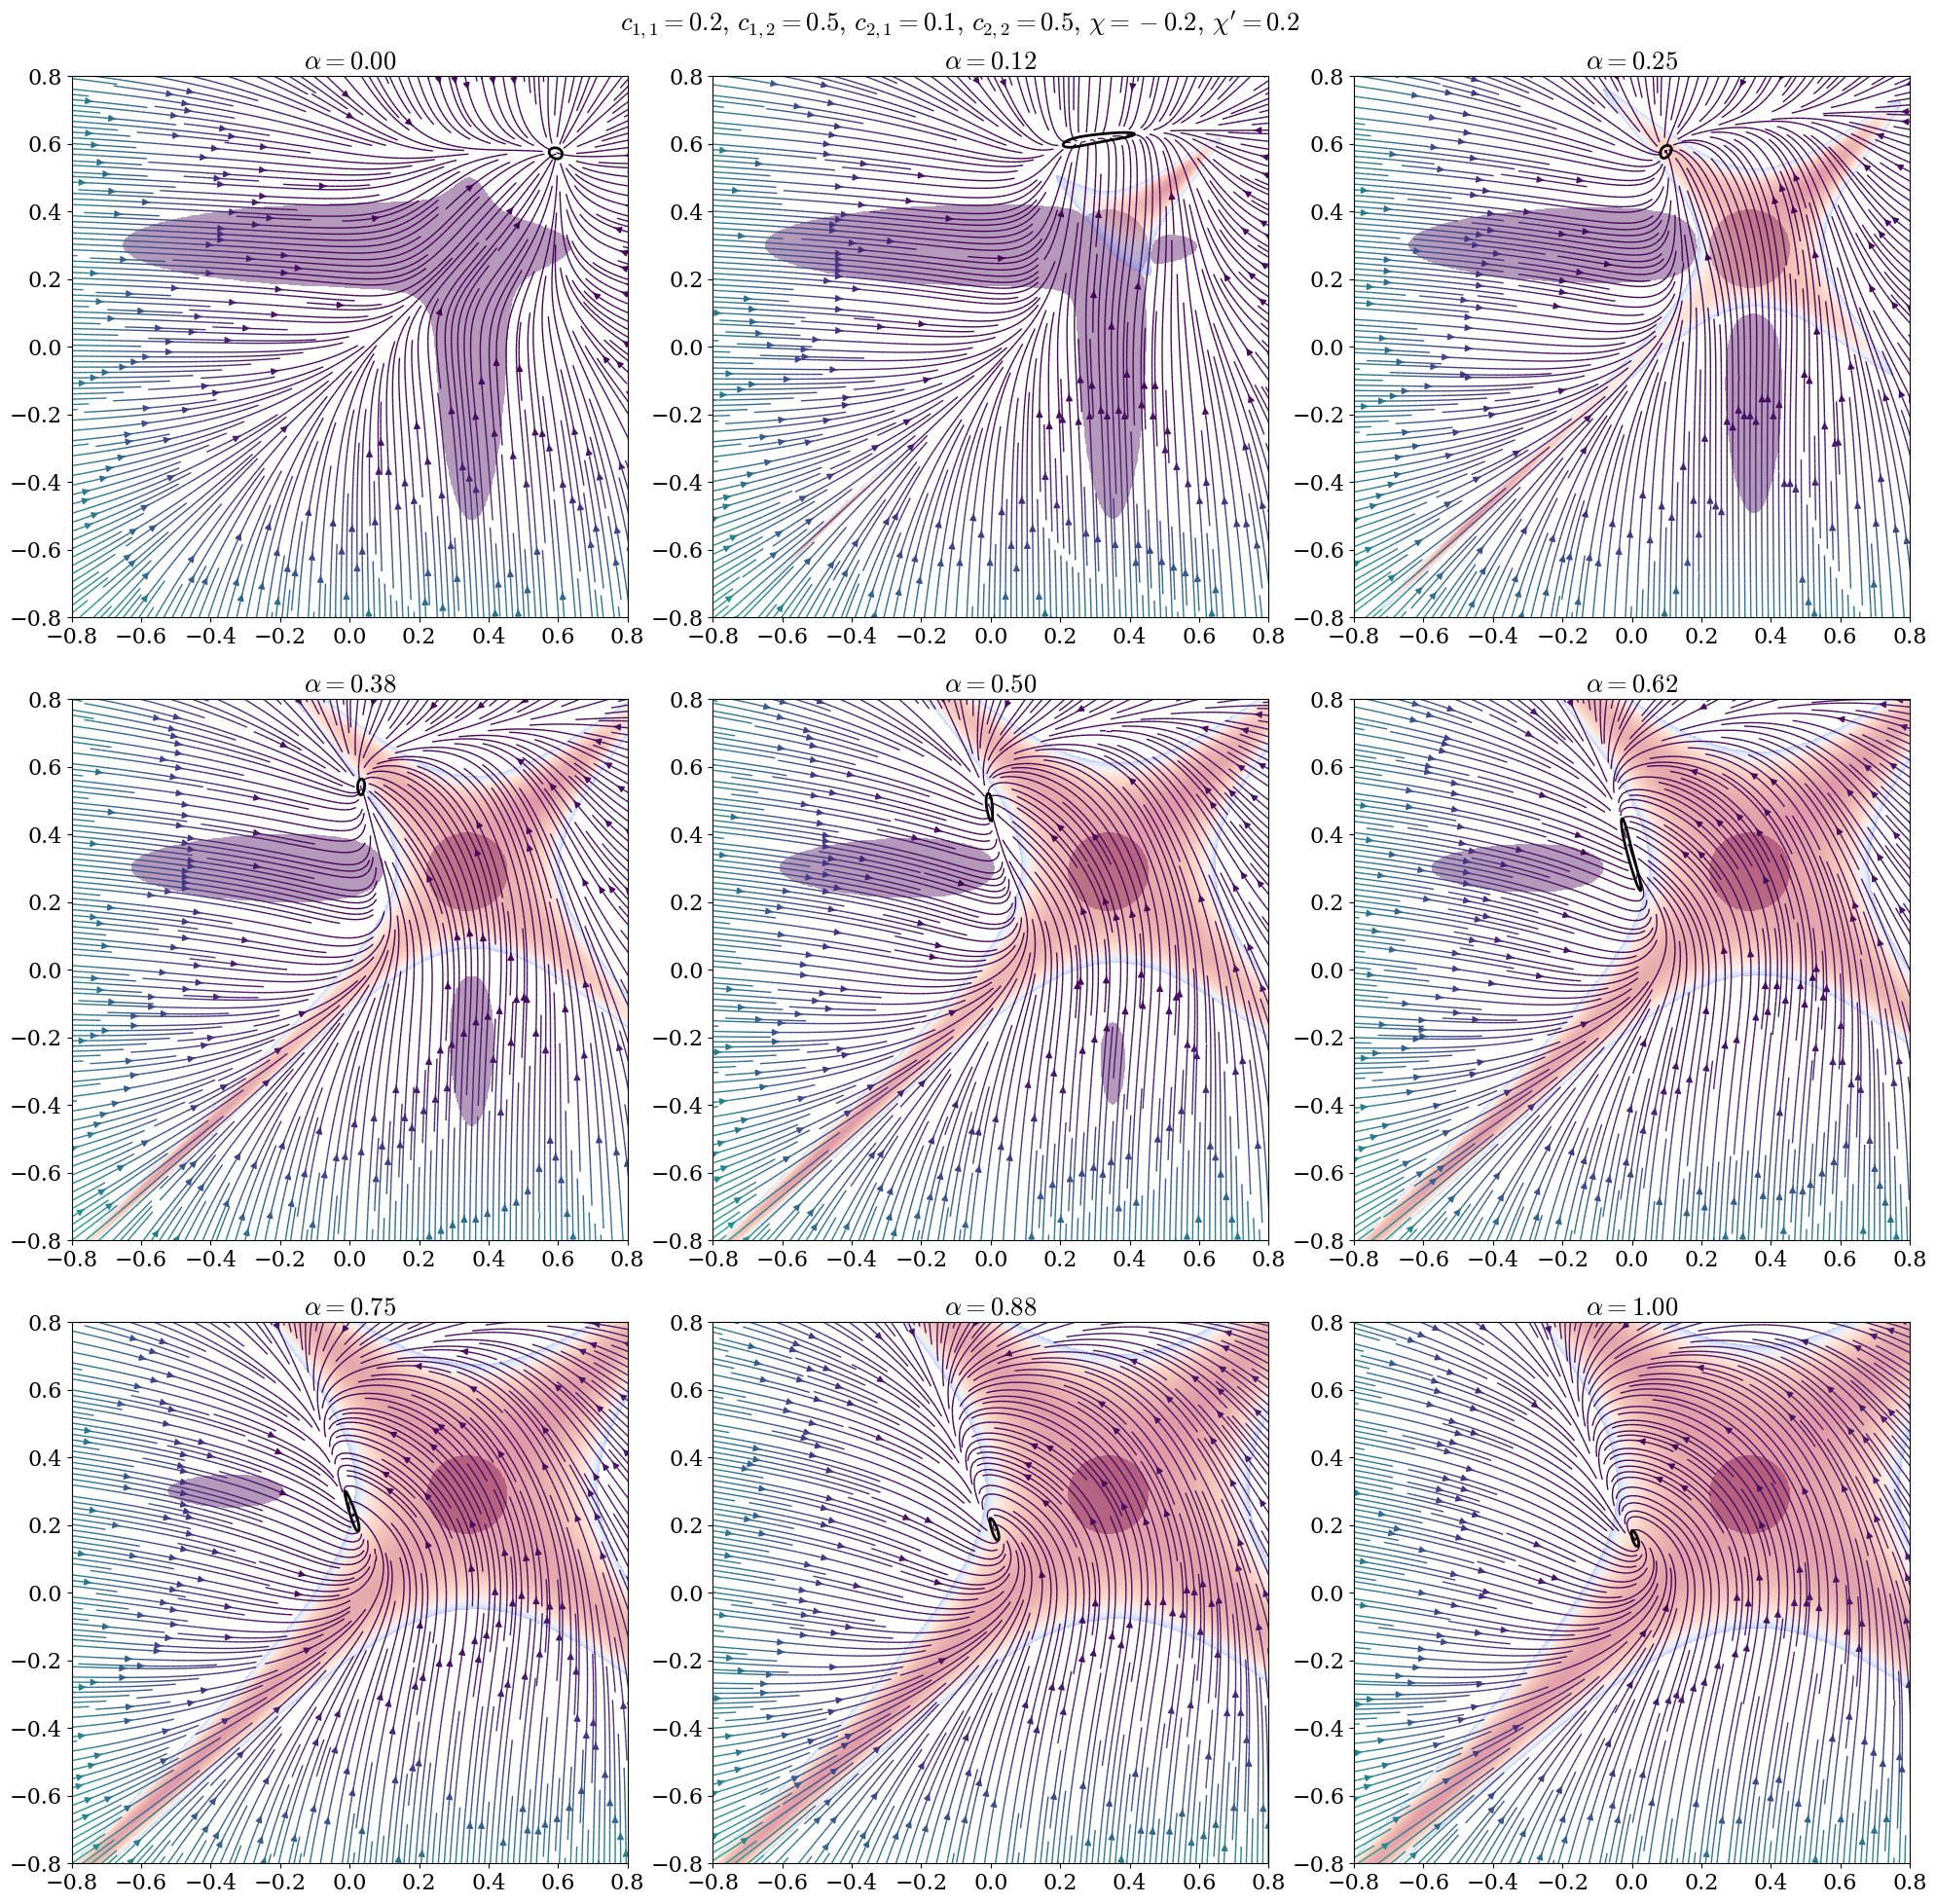

In [7]:
n = 1000
r = 1.
x1, x2 = np.meshgrid(np.linspace(-r, r, n), np.linspace(-r, r, n))
phi = [x1, x2]
m = 3
aa = np.linspace(.0, 1., m**2)

fig, ax = plt.subplots(m, m, figsize=(20, 20))

    
for n, a in enumerate(aa):
    u, v = f(phi, a)
    l = np.sqrt(u**2 + v**2)
    ax[n//m, n%m].pcolormesh(x1, x2, Cr(phi, a), alpha=.4)
    ax[n//m, n%m].pcolormesh(x1, x2, Ci(phi, a), alpha=.4, cmap='coolwarm')
    ax[n//m, n%m].streamplot(x1, x2, u, v, color=l, density=4., linewidth=1)

    w = (np.min(l), np.max(l))
    levels = np.linspace(w[0], w[-1], 1000)
    levels = levels[:2:]
    ax[n//m, n%m].contour(x1, x2, l, levels=levels, colors="black")

    ax[n//m, n%m].set_title("$\\alpha={:.2f}$".format(a))
    ax[n//m, n%m].set_xlim(-.8, .8)
    ax[n//m, n%m].set_ylim(-.8, .8)


fig.suptitle("$c_{{1,1}} = {},\, c_{{1,2}} = {},\, c_{{2,1}} = {},\, c_{{2,2}} = {},\, \\chi = {},\,  \\chi' = {}$".format(c[0,0], c[0,1], c[1,0], c[1,1], x[0], x[1]))
plt.tight_layout() 
# plt.savefig("fig/fig1.png")